# IMPORT LIBRARY AND LOAD DATASET

## IMPORT LIBRARY

In [11]:
# import libraries and resources
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import sheets
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## LOAD DATASET

In [12]:
# read the dataset using pandas
data = pd.read_csv('/content/drive/My Drive/Course/Datasets/student-scores.csv')
data.head()

id first_name last_name                                  email  gender  \
0   1       Paul     Casey         paul.casey.1@gslingacademy.com    male   
1   2   Danielle  Sandoval  danielle.sandoval.2@gslingacademy.com  female   
2   3       Tina   Andrews       tina.andrews.3@gslingacademy.com  female   
3   4       Tara     Clark         tara.clark.4@gslingacademy.com  female   
4   5    Anthony    Campos     anthony.campos.5@gslingacademy.com    male   

   part_time_job  absence_days  extracurricular_activities  \
0          False             3                       False   
1          False             2                       False   
2          False             9                        True   
3          False             5                       False   
4          False             5                       False   

   weekly_self_study_hours   career_aspiration  math_score  history_score  \
0                       27              Lawyer          73             81   
1                       47              Doctor          90             86   
2                       13  Government Officer          81             97   
3                        3              Artist          71             74   
4                       10             Unknown          84             77   

   physics_score  chemistry_score  biology_score  english_score  \
0             93               97             63             80   
1             96              100             90             88   
2             95               96             65             77   
3             88               80             89             63   
4             65               65             80             74   

   geography_score  
0               87  
1               90  
2               94  
3               86  
4               76

# EXPLORATORY DATA ANALYSIS

## GENERAL INFO DATASET

In [13]:
# general information about the dataset
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          2000 non-null   int64 
 1   first_name                  2000 non-null   object
 2   last_name                   2000 non-null   object
 3   email                       2000 non-null   object
 4   gender                      2000 non-null   object
 5   part_time_job               2000 non-null   bool  
 6   absence_days                2000 non-null   int64 
 7   extracurricular_activities  2000 non-null   bool  
 8   weekly_self_study_hours     2000 non-null   int64 
 9   career_aspiration           2000 non-null   object
 10  math_score                  2000 non-null   int64 
 11  history_score               2000 non-null   int64 
 12  physics_score               2000 non-null   int64 
 13  chemistry_score             2000 non-null   int6

id  absence_days  weekly_self_study_hours   math_score  \
count  2000.000000   2000.000000              2000.000000  2000.000000   
mean   1000.500000      3.665500                17.755500    83.452000   
std     577.494589      2.629271                12.129604    13.224906   
min       1.000000      0.000000                 0.000000    40.000000   
25%     500.750000      2.000000                 5.000000    77.000000   
50%    1000.500000      3.000000                18.000000    87.000000   
75%    1500.250000      5.000000                28.000000    93.000000   
max    2000.000000     10.000000                50.000000   100.000000   

       history_score  physics_score  chemistry_score  biology_score  \
count    2000.000000    2000.000000      2000.000000     2000.00000   
mean       80.332000      81.336500        79.995000       79.58150   
std        12.736046      12.539453        12.777895       13.72219   
min        50.000000      50.000000        50.000000       30.00000   
25%        69.750000      71.000000        69.000000       69.00000   
50%        82.000000      83.000000        81.000000       81.00000   
75%        91.000000      92.000000        91.000000       91.00000   
max       100.000000     100.000000       100.000000      100.00000   

       english_score  geography_score  
count    2000.000000      2000.000000  
mean       81.277500        80.888000  
std        12.027087        11.637705  
min        50.000000        60.000000  
25%        72.000000        71.000000  
50%        83.000000        81.000000  
75%        91.000000        91.000000  
max        99.000000       100.000000

In [14]:
# this displays the top 100 rows of the data
data.head(100)

id first_name last_name                                  email  gender  \
0     1       Paul     Casey         paul.casey.1@gslingacademy.com    male   
1     2   Danielle  Sandoval  danielle.sandoval.2@gslingacademy.com  female   
2     3       Tina   Andrews       tina.andrews.3@gslingacademy.com  female   
3     4       Tara     Clark         tara.clark.4@gslingacademy.com  female   
4     5    Anthony    Campos     anthony.campos.5@gslingacademy.com    male   
..  ...        ...       ...                                    ...     ...   
95   96   Victoria     Jones    victoria.jones.96@gslingacademy.com  female   
96   97    Natasha    Hansen    natasha.hansen.97@gslingacademy.com  female   
97   98     Thomas     White      thomas.white.98@gslingacademy.com    male   
98   99    Derrick  Figueroa  derrick.figueroa.99@gslingacademy.com    male   
99  100   Kimberly      Ward    kimberly.ward.100@gslingacademy.com  female   

    part_time_job  absence_days  extracurricular_activities  \
0           False             3                       False   
1           False             2                       False   
2           False             9                        True   
3           False             5                       False   
4           False             5                       False   
..            ...           ...                         ...   
95          False             2                        True   
96          False             3                        True   
97          False             3                       False   
98           True             0                       False   
99          False             0                       False   

    weekly_self_study_hours      career_aspiration  math_score  history_score  \
0                        27                 Lawyer          73             81   
1                        47                 Doctor          90             86   
2                        13     Government Officer          81             97   
3                         3                 Artist          71             74   
4                        10                Unknown          84             77   
..                      ...                    ...         ...            ...   
95                       34      Software Engineer         100             98   
96                        2                 Artist          86             76   
97                        4  Real Estate Developer          87             89   
98                       28                 Lawyer         100             93   
99                        5         Game Developer          85             89   

    physics_score  chemistry_score  biology_score  english_score  \
0              93               97             63             80   
1              96              100             90             88   
2              95               96             65             77   
3              88               80             89             63   
4              65               65             80             74   
..            ...              ...            ...            ...   
95             89               85             81             64   
96             84               93             76             69   
97             93               98             79             72   
98             85               61             96             83   
99             94               69             99             93   

    geography_score  
0                87  
1                90  
2                94  
3                86  
4                76  
..              ...  
95               94  
96               91  
97               88  
98               86  
99               98  

[100 rows x 17 columns]

In [15]:
# convert data to spreadsheets
sheet = sheets.InteractiveSheet(df=data)

https://docs.google.com/spreadsheets/d/1y8Y2sDzIxU1q8CUEQ8XZQuRiSWG-JeJYmi93xUCUa1w#gid=0


## DISTRIBUTION VALUES

### MATH VALUES

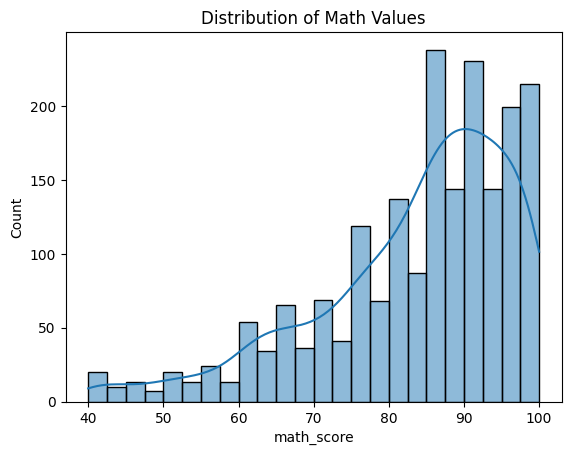

In [16]:
# check the distribution of math values
sns.histplot(data['math_score'], kde=True)
plt.title('Distribution of Math Values')
plt.show()

### HISTORY VALUES

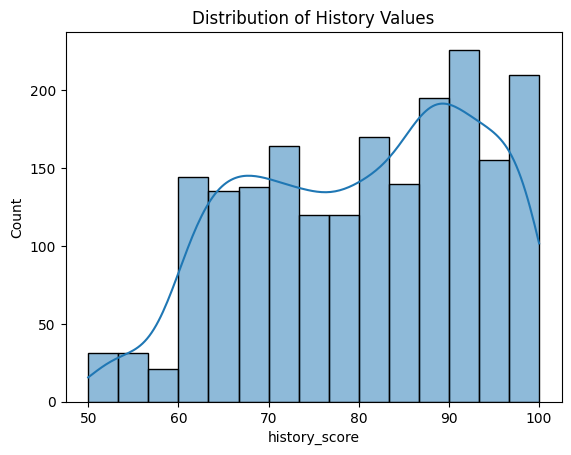

In [17]:
# check the distribution of history values
sns.histplot(data['history_score'], kde=True)
plt.title('Distribution of History Values')
plt.show()

### PHYSICS VALUES

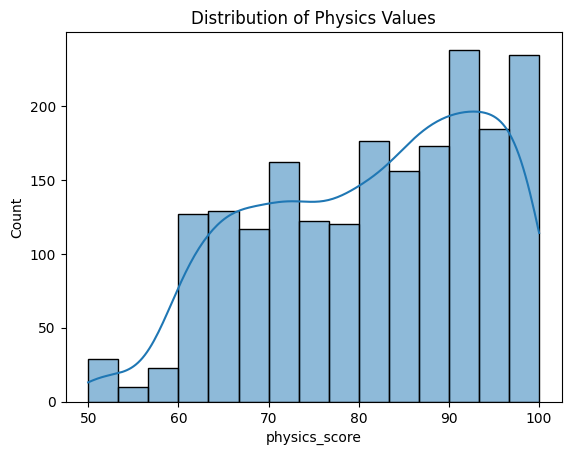

In [18]:
# check the distribution of physics values
sns.histplot(data['physics_score'], kde=True)
plt.title('Distribution of Physics Values')
plt.show()

### CHEMISTRY VALUES

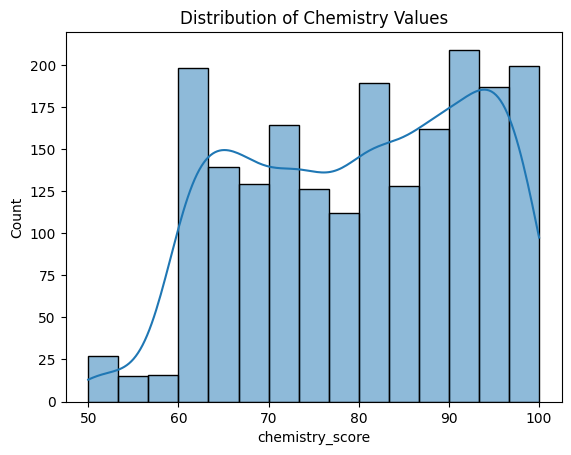

In [19]:
# check the distribution of chemistry values
sns.histplot(data['chemistry_score'], kde=True)
plt.title('Distribution of Chemistry Values')
plt.show()

### BIOLOGY VALUES

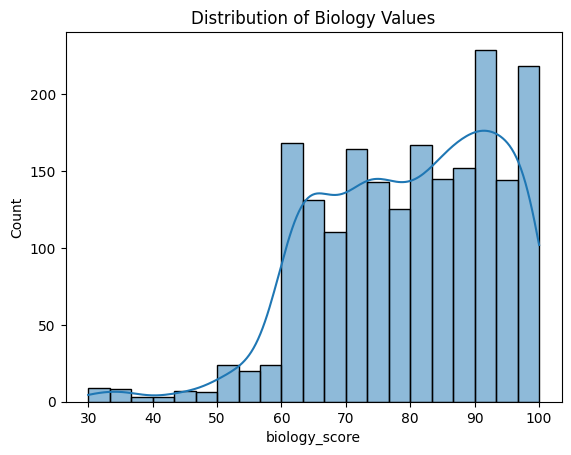

In [20]:
# check the distribution of biology values
sns.histplot(data['biology_score'], kde=True)
plt.title('Distribution of Biology Values')
plt.show()

### ENGLISH VALUES

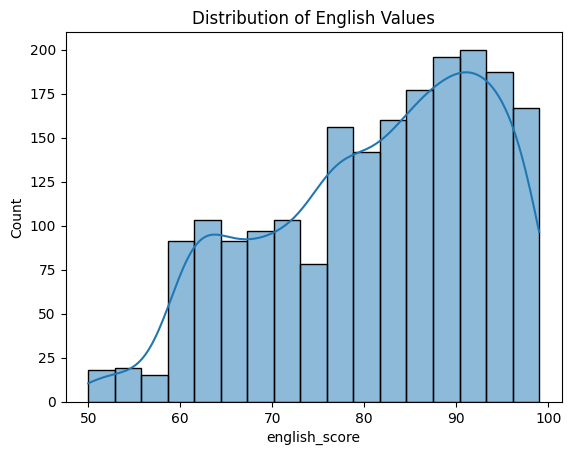

In [21]:
# check the distribution of english values
sns.histplot(data['english_score'], kde=True)
plt.title('Distribution of English Values')
plt.show()

### GEOGRAPHY VALUES

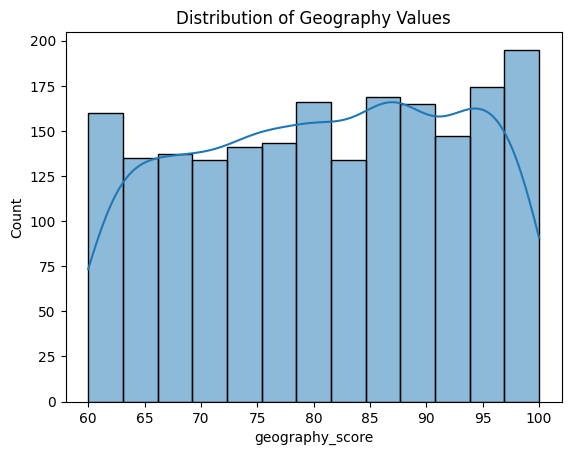

In [22]:
# check the distribution of geography values
sns.histplot(data['geography_score'], kde=True)
plt.title('Distribution of Geography Values')
plt.show()

## RELATIONSHIP BETWEEN FEATURES

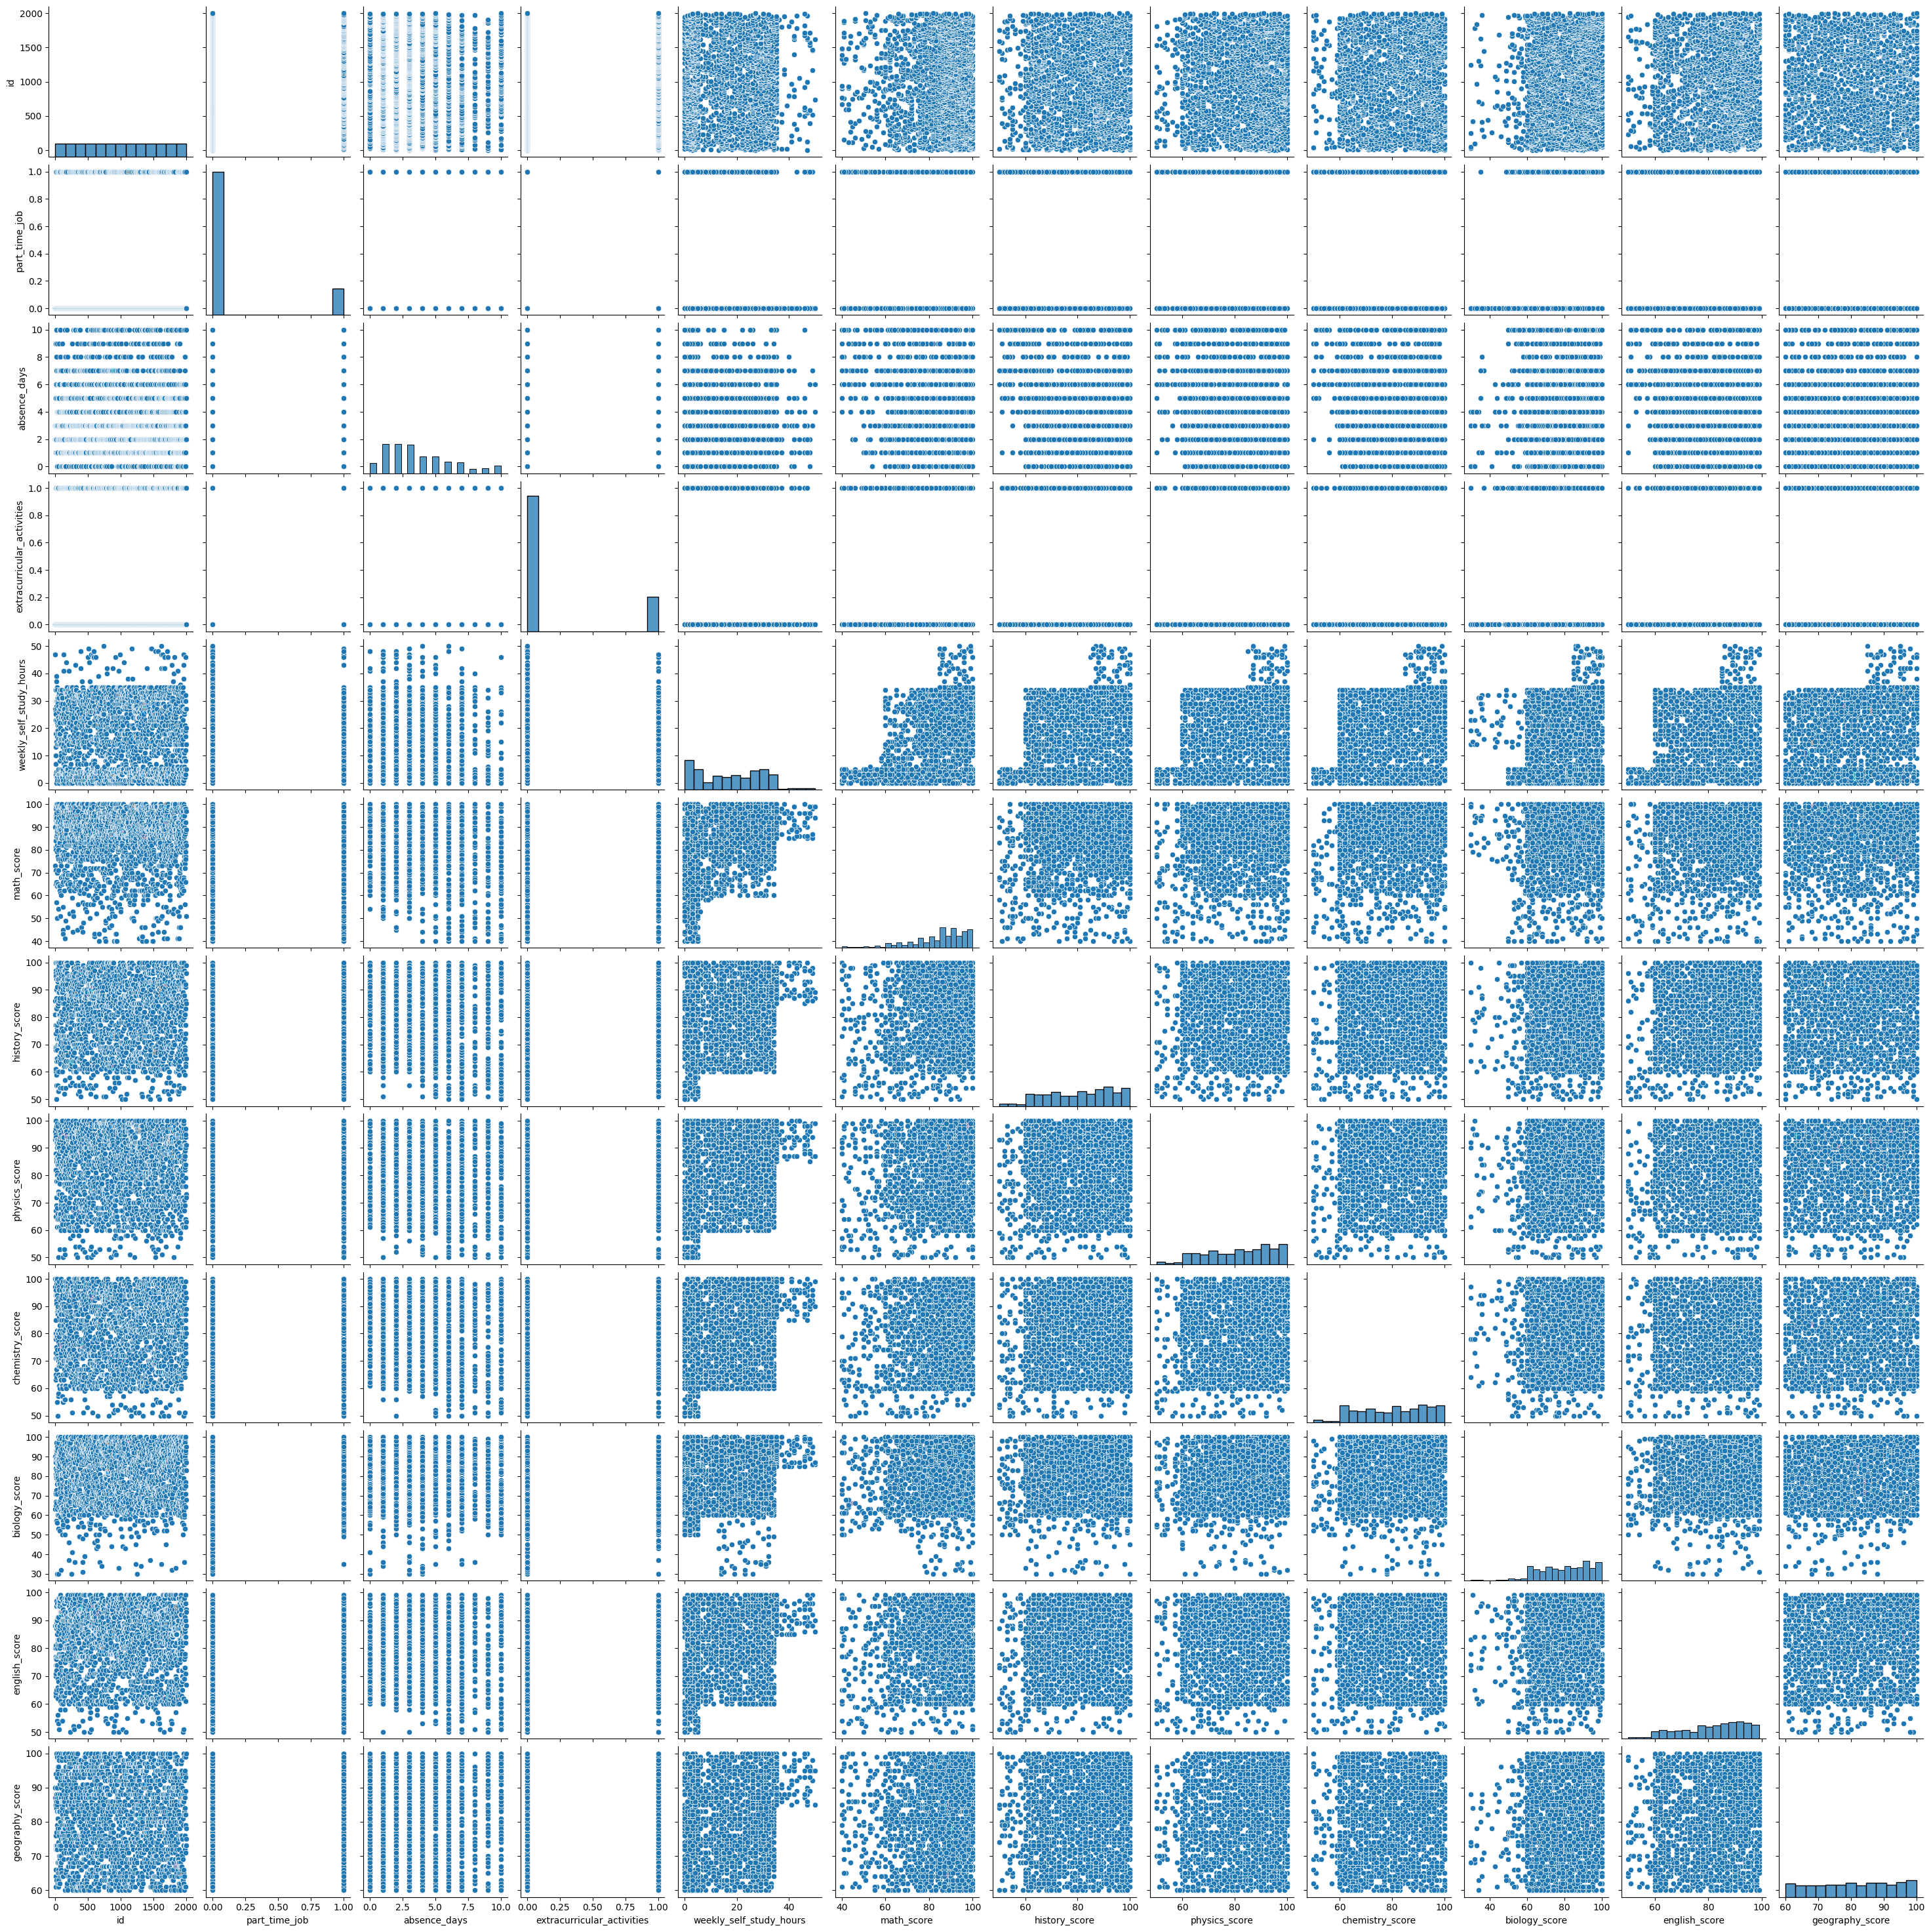

In [23]:
# check the relationship between features
sns.pairplot(data)
plt.show()

# FEATURE ENGINEERING

## DUPLICATED DATA

In [24]:
# check duplicated data
print("Number of Duplicate Data:", data.duplicated().sum())
data = data.drop_duplicates()

Number of Duplicate Data: 0


## MISSING VALUE HANDLING

In [25]:
# check missing value handling
print("Check Missing Values:")
print(data.isnull().sum())

Check Missing Values:
id                            0
first_name                    0
last_name                     0
email                         0
gender                        0
part_time_job                 0
absence_days                  0
extracurricular_activities    0
weekly_self_study_hours       0
career_aspiration             0
math_score                    0
history_score                 0
physics_score                 0
chemistry_score               0
biology_score                 0
english_score                 0
geography_score               0
dtype: int64


## OUTLIER ANALYSIS

### BOXPLOT MATH

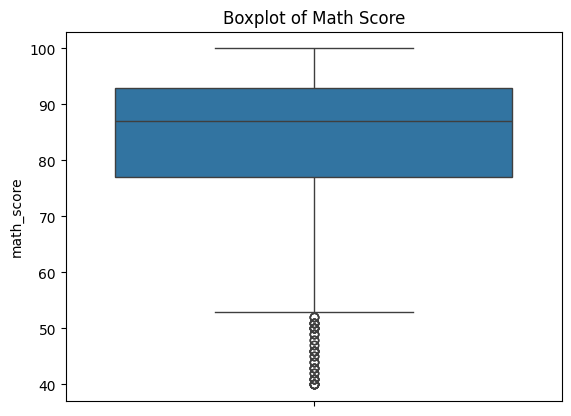

In [26]:
# visualisasi boxplot math score
sns.boxplot(data['math_score'])
plt.title('Boxplot of Math Score')
plt.show()

### BLOXPLOT HISTORY

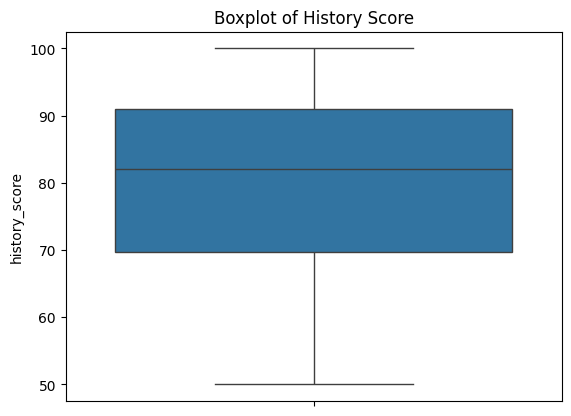

In [27]:
# visualisasi boxplot history score
sns.boxplot(data['history_score'])
plt.title('Boxplot of History Score')
plt.show()

### BLOXPLOT PHYSICS

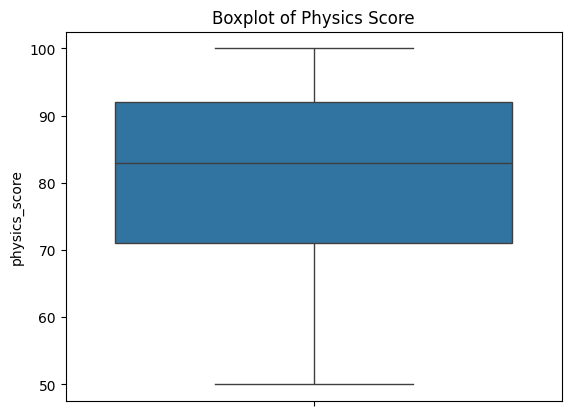

In [28]:
# visualisasi boxplot physics score
sns.boxplot(data['physics_score'])
plt.title('Boxplot of Physics Score')
plt.show()

### BLOXPLOT CHEMISTRY

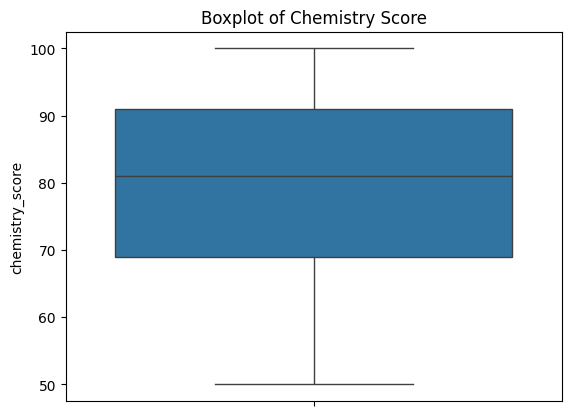

In [29]:
# visualisasi boxplot chemistry score
sns.boxplot(data['chemistry_score'])
plt.title('Boxplot of Chemistry Score')
plt.show()

### BLOXPLOT BIOLOGY

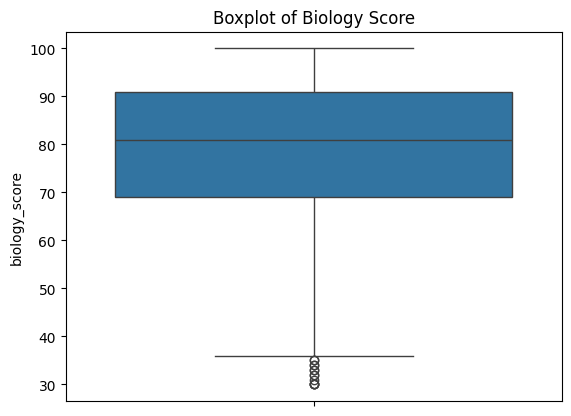

In [30]:
# visualisasi boxplot biology score
sns.boxplot(data['biology_score'])
plt.title('Boxplot of Biology Score')
plt.show()

### BLOXPLOT ENGLISH

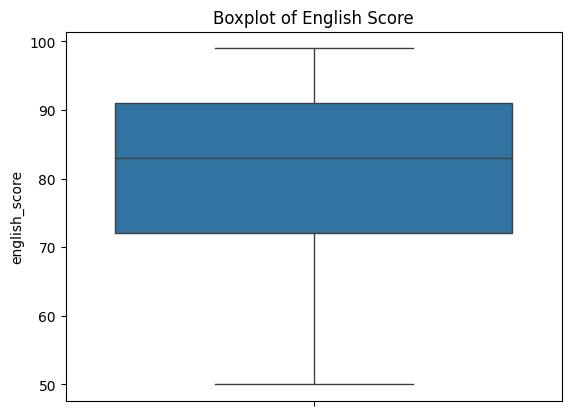

In [31]:
# visualisasi boxplot english score
sns.boxplot(data['english_score'])
plt.title('Boxplot of English Score')
plt.show()

### BLOXPLOT GEOGRAPHY

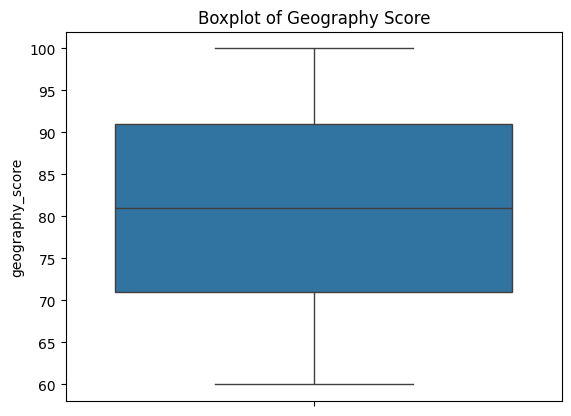

In [32]:
# visualisasi boxplot geography score
sns.boxplot(data['geography_score'])
plt.title('Boxplot of Geography Score')
plt.show()

# MACHINE LEARNING MODELLING

## SPLIT DATA

### MATH

In [33]:
# assume the 'weekly_self_study_hours' column as a feature and 'math_score' as a target
X = data[['weekly_self_study_hours']]
Ymath = data['math_score']

# split data into training and testing
X_train, X_test, Ymath_train, Ymath_test = train_test_split(X, Ymath, test_size=0.2, random_state=42)

### HISTORY

In [34]:
# assume the 'weekly_self_study_hours' column as a feature and 'history_score' as a target
X = data[['weekly_self_study_hours']]
Yhistory = data['history_score']

# split data into training and testing
X_train, X_test, Yhistory_train, Yhistory_test = train_test_split(X, Yhistory, test_size=0.2, random_state=42)

### PHYSICS

In [35]:
# assume the 'weekly_self_study_hours' column as a feature and 'physics_score' as a target
X = data[['weekly_self_study_hours']]
Yphysics = data['physics_score']

# split data into training and testing
X_train, X_test, Yphysics_train, Yphysics_test = train_test_split(X, Yphysics, test_size=0.2, random_state=42)

### CHEMISTRY

In [36]:
# assume the 'weekly_self_study_hours' column as a feature and 'chemistry_score' as a target
X = data[['weekly_self_study_hours']]
Ychemistry = data['chemistry_score']

# split data into training and testing
X_train, X_test, Ychemistry_train, Ychemistry_test = train_test_split(X, Ychemistry, test_size=0.2, random_state=42)

### BIOLOGY

In [37]:
# assume the 'weekly_self_study_hours' column as a feature and 'biology_score' as a target
X = data[['weekly_self_study_hours']]
Ybiology = data['biology_score']

# split data into training and testing
X_train, X_test, Ybiology_train, Ybiology_test = train_test_split(X, Ybiology, test_size=0.2, random_state=42)

### ENGLISH

In [38]:
# assume the 'weekly_self_study_hours' column as a feature and 'english_score' as a target
X = data[['weekly_self_study_hours']]
Yenglish = data['english_score']

# split data into training and testing
X_train, X_test, Yenglish_train, Yenglish_test = train_test_split(X, Yenglish, test_size=0.2, random_state=42)

### GEOGRAPHY

In [39]:
# assume the 'weekly_self_study_hours' column as a feature and 'geography_score' as a target
X = data[['weekly_self_study_hours']]
Ygeography = data['geography_score']

# split data into training and testing
X_train, X_test, Ygeography_train, Ygeography_test = train_test_split(X, Ygeography, test_size=0.2, random_state=42)

## MODEL TRAINING

### MATH

In [40]:
# linear regression
lr = LinearRegression()
lr.fit(X_train, Ymath_train)
Ymath_pred_lr = lr.predict(X_test)

# decision tree regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, Ymath_train)
Ymath_pred_dt = dt.predict(X_test)

# random forest regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, Ymath_train)
Ymath_pred_rf = rf.predict(X_test)

### HISTORY

In [41]:
# linear regression
lr = LinearRegression()
lr.fit(X_train, Yhistory_train)
Yhistory_pred_lr = lr.predict(X_test)

# decision tree regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, Yhistory_train)
Yhistory_pred_dt = dt.predict(X_test)

# random forest regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, Yhistory_train)
Yhistory_pred_rf = rf.predict(X_test)

### PHYSICS

In [42]:
# linear regression
lr = LinearRegression()
lr.fit(X_train, Yphysics_train)
Yphysics_pred_lr = lr.predict(X_test)

# decision tree regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, Yphysics_train)
Yphysics_pred_dt = dt.predict(X_test)

# random forest regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, Yphysics_train)
Yphysics_pred_rf = rf.predict(X_test)

### CHEMISTRY

In [43]:
# linear regression
lr = LinearRegression()
lr.fit(X_train, Ychemistry_train)
Ychemistry_pred_lr = lr.predict(X_test)

# decision tree regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, Ychemistry_train)
Ychemistry_pred_dt = dt.predict(X_test)

# random forest regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, Ychemistry_train)
Ychemistry_pred_rf = rf.predict(X_test)

### BIOLOGY

In [44]:
# linear regression
lr = LinearRegression()
lr.fit(X_train, Ybiology_train)
Ybiology_pred_lr = lr.predict(X_test)

# decision tree regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, Ybiology_train)
Ybiology_pred_dt = dt.predict(X_test)

# random forest regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, Ybiology_train)
Ybiology_pred_rf = rf.predict(X_test)

### ENGLISH

In [45]:
# linear regression
lr = LinearRegression()
lr.fit(X_train, Yenglish_train)
Yenglish_pred_lr = lr.predict(X_test)

# decision tree regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, Yenglish_train)
Yenglish_pred_dt = dt.predict(X_test)

# random forest regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, Yenglish_train)
Yenglish_pred_rf = rf.predict(X_test)

### GEOGRAPHY

In [46]:
# linear regression
lr = LinearRegression()
lr.fit(X_train, Ygeography_train)
Ygeography_pred_lr = lr.predict(X_test)

# decision tree regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, Ygeography_train)
Ygeography_pred_dt = dt.predict(X_test)

# random forest regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, Ygeography_train)
Ygeography_pred_rf = rf.predict(X_test)

# EVALUATION MODEL

## MATH

In [47]:
# functions for model evaluation
def evaluate_model(Ymath_test, Ymath_pred, model_name):
    mse = mean_squared_error(Ymath_test, Ymath_pred)
    r2 = r2_score(Ymath_test, Ymath_pred)
    print(f"{model_name} - MSE: {mse:.2f}, R2 Score: {r2:.2f}")

evaluate_model(Ymath_test, Ymath_pred_lr, "Linear Regression")
evaluate_model(Ymath_test, Ymath_pred_dt, "Decision Tree Regressor")
evaluate_model(Ymath_test, Ymath_pred_rf, "Random Forest Regressor")

Linear Regression - MSE: 139.04, R2 Score: 0.16
Decision Tree Regressor - MSE: 144.23, R2 Score: 0.13
Random Forest Regressor - MSE: 144.83, R2 Score: 0.13


## HISTORY

In [48]:
# functions for model evaluation
def evaluate_model(Yhistory_test, Yhistory_pred, model_name):
    mse = mean_squared_error(Yhistory_test, Yhistory_pred)
    r2 = r2_score(Yhistory_test, Yhistory_pred)
    print(f"{model_name} - MSE: {mse:.2f}, R2 Score: {r2:.2f}")

evaluate_model(Yhistory_test, Yhistory_pred_lr, "Linear Regression")
evaluate_model(Yhistory_test, Yhistory_pred_dt, "Decision Tree Regressor")
evaluate_model(Yhistory_test, Yhistory_pred_rf, "Random Forest Regressor")

Linear Regression - MSE: 163.85, R2 Score: 0.10
Decision Tree Regressor - MSE: 161.21, R2 Score: 0.12
Random Forest Regressor - MSE: 160.86, R2 Score: 0.12


## PHYSICS

In [49]:
# functions for model evaluation
def evaluate_model(Yphysics_test, Yphysics_pred, model_name):
    mse = mean_squared_error(Yphysics_test, Yphysics_pred)
    r2 = r2_score(Yphysics_test, Yphysics_pred)
    print(f"{model_name} - MSE: {mse:.2f}, R2 Score: {r2:.2f}")

evaluate_model(Yphysics_test, Yphysics_pred_lr, "Linear Regression")
evaluate_model(Yphysics_test, Yphysics_pred_dt, "Decision Tree Regressor")
evaluate_model(Yphysics_test, Yphysics_pred_rf, "Random Forest Regressor")

Linear Regression - MSE: 156.89, R2 Score: 0.03
Decision Tree Regressor - MSE: 151.60, R2 Score: 0.06
Random Forest Regressor - MSE: 151.04, R2 Score: 0.07


## CHEMISTRY

In [50]:
# functions for model evaluation
def evaluate_model(Ychemistry_test, Ychemistry_pred, model_name):
    mse = mean_squared_error(Ychemistry_test, Ychemistry_pred)
    r2 = r2_score(Ychemistry_test, Ychemistry_pred)
    print(f"{model_name} - MSE: {mse:.2f}, R2 Score: {r2:.2f}")

evaluate_model(Ychemistry_test, Ychemistry_pred_lr, "Linear Regression")
evaluate_model(Ychemistry_test, Ychemistry_pred_dt, "Decision Tree Regressor")
evaluate_model(Ychemistry_test, Ychemistry_pred_rf, "Random Forest Regressor")

Linear Regression - MSE: 160.41, R2 Score: 0.04
Decision Tree Regressor - MSE: 159.36, R2 Score: 0.05
Random Forest Regressor - MSE: 159.07, R2 Score: 0.05


## BIOLOGY

In [51]:
# functions for model evaluation
def evaluate_model(Ybiology_test, Ybiology_pred, model_name):
    mse = mean_squared_error(Ybiology_test, Ybiology_pred)
    r2 = r2_score(Ybiology_test, Ybiology_pred)
    print(f"{model_name} - MSE: {mse:.2f}, R2 Score: {r2:.2f}")

evaluate_model(Ybiology_test, Ybiology_pred_lr, "Linear Regression")
evaluate_model(Ybiology_test, Ybiology_pred_dt, "Decision Tree Regressor")
evaluate_model(Ybiology_test, Ybiology_pred_rf, "Random Forest Regressor")

Linear Regression - MSE: 201.89, R2 Score: 0.04
Decision Tree Regressor - MSE: 193.85, R2 Score: 0.08
Random Forest Regressor - MSE: 193.42, R2 Score: 0.08


## ENGLISH

In [52]:
# functions for model evaluation
def evaluate_model(Yenglish_test, Yenglish_pred, model_name):
    mse = mean_squared_error(Yenglish_test, Yenglish_pred)
    r2 = r2_score(Yenglish_test, Yenglish_pred)
    print(f"{model_name} - MSE: {mse:.2f}, R2 Score: {r2:.2f}")

evaluate_model(Yenglish_test, Yenglish_pred_lr, "Linear Regression")
evaluate_model(Yenglish_test, Yenglish_pred_dt, "Decision Tree Regressor")
evaluate_model(Yenglish_test, Yenglish_pred_rf, "Random Forest Regressor")

Linear Regression - MSE: 140.64, R2 Score: 0.07
Decision Tree Regressor - MSE: 141.51, R2 Score: 0.06
Random Forest Regressor - MSE: 141.24, R2 Score: 0.07


## GEOGRAPHY

In [53]:
# functions for model evaluation
def evaluate_model(Ygeography_test, Ygeography_pred, model_name):
    mse = mean_squared_error(Ygeography_test, Ygeography_pred)
    r2 = r2_score(Ygeography_test, Ygeography_pred)
    print(f"{model_name} - MSE: {mse:.2f}, R2 Score: {r2:.2f}")

evaluate_model(Ygeography_test, Ygeography_pred_lr, "Linear Regression")
evaluate_model(Ygeography_test, Ygeography_pred_dt, "Decision Tree Regressor")
evaluate_model(Ygeography_test, Ygeography_pred_rf, "Random Forest Regressor")

Linear Regression - MSE: 137.68, R2 Score: 0.05
Decision Tree Regressor - MSE: 135.71, R2 Score: 0.06
Random Forest Regressor - MSE: 135.36, R2 Score: 0.06


# CONCLUSION

Math : Linear Regression - MSE: 139.04, R2 Score: 0.16

History : Random Forest Regressor - MSE: 160.86, R2 Score: 0.12

Physics : Random Forest Regressor - MSE: 151.04, R2 Score: 0.07

Chemistry : Random Forest Regressor - MSE: 159.07, R2 Score: 0.05

Biology : Random Forest Regressor - MSE: 193.42, R2 Score: 0.08

English : Linear Regression - MSE: 140.64, R2 Score: 0.07

Geography : Random Forest Regressor - MSE: 135.36, R2 Score: 0.06